# numerical - EDA (12월 23일 시작~)

# numerical 데이터를 합성해보자 (+, -, *, /)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob
import os
import scipy

%matplotlib inline

In [3]:
pd.__version__

'1.0.1'

In [4]:
scipy.__version__

'1.4.1'

In [ ]:
import seaborn as sns
import pylift
import seaborn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from collections import Counter

In [8]:
import featexp

In [9]:
pwd

'/mnt/sda1/myeonggyulee/myeonggyulee/uplift/2020_0113'



---



---



# 1. 데이터 로드
- 전처리된 데이터 : preprocessed_uplift_191223.csv


In [10]:
data = pd.read_csv('preprocessed_uplift_191223.csv', index_col = 0)

In [11]:
data.head()

,crm_id,cmpn_nm,m_id,cont_group,start_date,end_date,min_value,max_value,text_yn,push_yn,...,text_mail_wemakepay_bool,birth,click_cnt,search_cnt,download_coupon_cnt,cart_cnt,cart_category_cnt,cart_buy_cnt,uv_cnt,ad_uv_yn
0,33,~3day,1000298,0,2019-11-20,2019-11-20,0,0,1,0,...,0,30,169,84,11,60,11,30,55,1
1,33,~3day,1000347,1,2019-11-14,2019-11-14,30000,5000,1,0,...,0,30,6,0,0,1,1,2,4,1
2,33,~3day,1000571,0,2019-11-14,2019-11-14,0,0,1,1,...,0,40,38,22,2,1,1,4,3,1
3,33,~3day,1001894,1,2019-11-11,2019-11-11,30000,5000,1,0,...,0,30,45,25,1,6,6,5,10,1
4,33,~3day,1002503,1,2019-11-12,2019-11-12,30000,5000,1,0,...,0,80,122,50,16,112,11,42,56,1


In [12]:
data.shape

(419554, 56)

In [13]:
data.columns

Index(['crm_id', 'cmpn_nm', 'm_id', 'cont_group', 'start_date', 'end_date',
       'min_value', 'max_value', 'text_yn', 'push_yn', 'mail_yn',
       'last_buy_date', 'result_buy_yn', 'buy_period', 'buy_cnt_date',
       'buy_cnt_payment', 'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'buy_amount_3day',
       'buy_cnt_payment_3day', 'buy_ep_yn_3day', 'buy_amount_avg',
       'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'ratio_spc', 'referral_source',
       'referral_flag', 'refund_rate', 'wmp_freq', 'wmp_stay_avg',
       'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay', 'text_mail_wemakepay_bool',
       'birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt',
       'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419554 entries, 0 to 419553
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   crm_id                    419554 non-null  int64  
 1   cmpn_nm                   419554 non-null  object 
 2   m_id                      419554 non-null  int64  
 3   cont_group                419554 non-null  int64  
 4   start_date                419554 non-null  object 
 5   end_date                  419554 non-null  object 
 6   min_value                 419554 non-null  int64  
 7   max_value                 419554 non-null  int64  
 8   text_yn                   419554 non-null  int64  
 9   push_yn                   419554 non-null  int64  
 10  mail_yn                   419554 non-null  int64  
 11  last_buy_date             419554 non-null  object 
 12  result_buy_yn             419554 non-null  int64  
 13  buy_period                419554 non-null  f

In [15]:
data.nunique()

crm_id                           1
cmpn_nm                          1
m_id                        411220
cont_group                       2
start_date                      10
end_date                        10
min_value                        2
max_value                        2
text_yn                          2
push_yn                          2
mail_yn                          2
last_buy_date                   14
result_buy_yn                    2
buy_period                     400
buy_cnt_date                   175
buy_cnt_payment                324
buy_amount                  288765
buying_trend                   755
buying_trend_group               3
cate_buy_cnt                    95
cate_rate                       99
coupon_use_rate                101
buy_amount_3day              19606
buy_cnt_payment_3day            12
buy_ep_yn_3day                   2
buy_amount_avg               95771
visit_gubn                       3
dt_cnt_last_visit             1295
dt_cnt_last_buy     

In [16]:
data.isnull().sum()

crm_id                      0
cmpn_nm                     0
m_id                        0
cont_group                  0
start_date                  0
end_date                    0
min_value                   0
max_value                   0
text_yn                     0
push_yn                     0
mail_yn                     0
last_buy_date               0
result_buy_yn               0
buy_period                  0
buy_cnt_date                0
buy_cnt_payment             0
buy_amount                  0
buying_trend                0
buying_trend_group          0
cate_buy_cnt                0
cate_rate                   0
coupon_use_rate             0
buy_amount_3day             0
buy_cnt_payment_3day        0
buy_ep_yn_3day              0
buy_amount_avg              0
visit_gubn                  0
dt_cnt_last_visit           0
dt_cnt_last_buy             0
last_buy_seg                0
last_buy_platform           0
wmp_pay_yn                  0
ratio_spc                   0
referral_s

---

---

> ## # 실험군/대조군 정보 : 1/0

In [17]:
# raw 데이터, 실험군의 비율
data[data.cont_group == 0].shape[0]/data.shape[0]

0.07654556981937963

----

# # 날짜별 size

In [18]:
data.groupby('start_date').size()

start_date
2019-11-11    43746
2019-11-12    43607
2019-11-13    42318
2019-11-14    47531
2019-11-15    40873
2019-11-18    26350
2019-11-19    47219
2019-11-20    44299
2019-11-21    41976
2019-11-22    41635
dtype: int64

In [19]:
data.groupby('start_date').size()/data.shape[0] # 21일 전후로 나누자!

start_date
2019-11-11    0.104268
2019-11-12    0.103937
2019-11-13    0.100864
2019-11-14    0.113289
2019-11-15    0.097420
2019-11-18    0.062805
2019-11-19    0.112546
2019-11-20    0.105586
2019-11-21    0.100049
2019-11-22    0.099236
dtype: float64

---

> ### 구매비율 차이

In [22]:
# raw 데이터, 실험군/대조군의 구매비율 - (raw데이터와 조금 다르지만, 차이 양상은 유지돼!)

exp_buy = data[(data.cont_group == 1) & (data.result_buy_yn == 1)].shape[0]
exp_buy_ratio = data[(data.cont_group == 1) & (data.result_buy_yn == 1)].shape[0]/data[(data.cont_group == 1)].shape[0]

cont_buy = data[(data.cont_group == 0) & (data.result_buy_yn == 1)].shape[0]
cont_buy_ratio = data[(data.cont_group == 0) & (data.result_buy_yn == 1)].shape[0]/data[(data.cont_group == 0)].shape[0]

print( f'Preprocessed data, trt_buy_ratio : {round(exp_buy_ratio, 3)*100} %,  size: {exp_buy}' )
print( f'Preprocessed data, cont_buy_ratio : {round(cont_buy_ratio, 3)*100} %, size: {cont_buy}' )

Preprocessed data, trt_buy_ratio : 9.5 %,  size: 36735
Preprocessed data, cont_buy_ratio : 9.0 %, size: 2894


---
---

In [23]:
len(data.columns)

56

In [24]:
data.columns

Index(['crm_id', 'cmpn_nm', 'm_id', 'cont_group', 'start_date', 'end_date',
       'min_value', 'max_value', 'text_yn', 'push_yn', 'mail_yn',
       'last_buy_date', 'result_buy_yn', 'buy_period', 'buy_cnt_date',
       'buy_cnt_payment', 'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'buy_amount_3day',
       'buy_cnt_payment_3day', 'buy_ep_yn_3day', 'buy_amount_avg',
       'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'ratio_spc', 'referral_source',
       'referral_flag', 'refund_rate', 'wmp_freq', 'wmp_stay_avg',
       'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay', 'text_mail_wemakepay_bool',
       'birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt',
       'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad

In [20]:
# 모델링에 사용될 Features 따로 정의한다
# cont_group(잠재변수) / result_buy_yn(종속변수)

used_features = ['cont_group', 'result_buy_yn', 'text_yn', 'push_yn', 'mail_yn',
       'buy_period', 'buy_cnt_date', 'buy_cnt_payment', 
       'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'buy_amount_3day',
       'buy_cnt_payment_3day', 'buy_ep_yn_3day', 'buy_amount_avg',
       'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'ratio_spc', 
       'referral_flag', 'refund_rate', 'wmp_freq', 'wmp_stay_avg',
       'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay', 'text_mail_wemakepay_bool',
       'birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt',
       'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad_uv_yn']

In [21]:
len(set(used_features))

47

In [22]:
# 맞는지 확인 - 맞다
set(data.columns) - set(used_features)

{'cmpn_nm',
 'crm_id',
 'end_date',
 'last_buy_date',
 'm_id',
 'max_value',
 'min_value',
 'referral_source',
 'start_date'}

In [23]:
cate_features = ['text_yn', 'push_yn', 'mail_yn',
       'buying_trend_group', 'buy_ep_yn_3day', 'visit_gubn', 'last_buy_seg',
       'last_buy_platform', 'wmp_pay_yn', 'referral_flag', 
       'order_route', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_', 'text_mail_wemakepay_bool', 'birth', 'ad_uv_yn']

In [24]:
len(cate_features)

17

In [25]:
data[cate_features].astype('category').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419554 entries, 0 to 419553
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   text_yn                   419554 non-null  category
 1   push_yn                   419554 non-null  category
 2   mail_yn                   419554 non-null  category
 3   buying_trend_group        419554 non-null  category
 4   buy_ep_yn_3day            419554 non-null  category
 5   visit_gubn                419554 non-null  category
 6   last_buy_seg              419554 non-null  category
 7   last_buy_platform         419554 non-null  category
 8   wmp_pay_yn                419554 non-null  category
 9   referral_flag             419554 non-null  category
 10  order_route               419554 non-null  category
 11  buy_amount_avg_all_seg    419554 non-null  category
 12  rgt_elapsed_days_seg      419554 non-null  category
 13  cate_main_buy_            419

In [31]:
data.groupby(['result_buy_yn', 'cont_group'])['text_yn'].mean()

result_buy_yn  cont_group
0              0             0.660895
               1             0.659744
1              0             0.681410
               1             0.698925
Name: text_yn, dtype: float64

In [32]:
data.groupby(['result_buy_yn', 'cont_group'])['mail_yn'].mean()

result_buy_yn  cont_group
0              0             0.650320
               1             0.647255
1              0             0.659295
               1             0.670587
Name: mail_yn, dtype: float64

In [33]:
data.groupby(['result_buy_yn', 'cont_group'])['push_yn'].mean()

result_buy_yn  cont_group
0              0             0.339345
               1             0.344561
1              0             0.440567
               1             0.419709
Name: push_yn, dtype: float64

In [34]:
data.groupby(['result_buy_yn', 'cont_group'])['wmp_pay_yn'].mean()

result_buy_yn  cont_group
0              0             0.085076
               1             0.084473
1              0             0.096752
               1             0.098789
Name: wmp_pay_yn, dtype: float64

In [35]:
data[['text_yn', 'push_yn', 'mail_yn', 'wmp_pay_yn', 'text_mail_wemakepay']].head(10)

,text_yn,push_yn,mail_yn,wmp_pay_yn,text_mail_wemakepay
0,1,0,1,0,2
1,1,0,1,0,2
2,1,1,1,0,2
3,1,0,1,0,2
4,1,0,1,0,2
5,1,0,1,0,2
6,1,0,1,0,2
7,0,0,1,0,1
8,1,0,1,0,2
9,0,0,0,0,0


In [36]:
data.groupby(['result_buy_yn', 'cont_group'])['text_mail_wemakepay_bool'].mean()

result_buy_yn  cont_group
0              0             0.048595
               1             0.047219
1              0             0.054596
               1             0.059045
Name: text_mail_wemakepay_bool, dtype: float64

In [37]:
data.groupby(['result_buy_yn', 'cont_group'])['text_mail_wemakepay'].mean()

result_buy_yn  cont_group
0              0             1.396290
               1             1.391473
1              0             1.437457
               1             1.468300
Name: text_mail_wemakepay, dtype: float64

In [38]:
### category OHE 이렇게 하면 된다~~!
pd.get_dummies(data[cate_features].astype('category')).head()

,text_yn_0,text_yn_1,push_yn_0,push_yn_1,mail_yn_0,mail_yn_1,buying_trend_group_long,buying_trend_group_short,buying_trend_group_stable,buy_ep_yn_3day_N,buy_ep_yn_3day_Y,visit_gubn_N,visit_gubn_O,visit_gubn_R,last_buy_seg_D-1,last_buy_seg_D-2,last_buy_seg_D-3,last_buy_platform_APP,last_buy_platform_MWEB,last_buy_platform_PC,wmp_pay_yn_0,wmp_pay_yn_1,referral_flag_direct,referral_flag_inside,referral_flag_not set,referral_flag_outside,order_route_best,order_route_else,order_route_special,order_route_wmp_pick,buy_amount_avg_all_seg_0,buy_amount_avg_all_seg_1,buy_amount_avg_all_seg_2,buy_amount_avg_all_seg_3,buy_amount_avg_all_seg_4,buy_amount_avg_all_seg_5,rgt_elapsed_days_seg_0,rgt_elapsed_days_seg_1,rgt_elapsed_days_seg_2,rgt_elapsed_days_seg_3,rgt_elapsed_days_seg_4,rgt_elapsed_days_seg_5,cate_main_buy__0,cate_main_buy__1,cate_main_buy__2,cate_main_buy__3,cate_main_buy__4,cate_main_buy__5,cate_main_buy__6,cate_main_buy__7,cate_main_buy__8,cate_main_buy__9,cate_main_buy__10,cate_main_buy__11,text_mail_wemakepay_bool_0,text_mail_wemakepay_bool_1,birth_10,birth_20,birth_30,birth_40,birth_50,birth_60,birth_80,ad_uv_yn_0,ad_uv_yn_1
0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
2,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


---

In [26]:
numerical_features = list(set(used_features) - set(cate_features) - set(['cont_group', 'result_buy_yn']))

In [27]:
for numerical in numerical_features: # 순서 뒤죽박죽이다 -> 아래와 같이 순서정리
    print(numerical)

buy_amount_avg
cate_rate
dt_cnt_last_buy
buy_amount
coupon_use_rate
buy_cnt_payment
download_coupon_cnt
cart_buy_cnt
wmp_stay_avg
dt_cnt_last_visit
buy_period
wmp_pick_click
buy_cnt_payment_3day
buy_amount_3day
click_cnt
buy_amount_avg_all
ratio_spc
search_cnt
refund_rate
text_mail_wemakepay
cart_cnt
uv_cnt
cart_category_cnt
buy_cnt_date
buying_trend
rgt_elapsed_days
wmp_freq
cate_buy_cnt


In [28]:
# 순서 정리
numerical_features = [
    
    'buy_period',
    'buy_cnt_date',
    'buy_cnt_payment',
    'buy_amount',
    'buying_trend',
    'cate_buy_cnt',
    'cate_rate',
    'coupon_use_rate',
    'buy_amount_3day',
    'buy_cnt_payment_3day',
    'buy_amount_avg',
    'dt_cnt_last_visit',
    'dt_cnt_last_buy',
    'ratio_spc',
    'refund_rate',
    'wmp_freq',
    'wmp_stay_avg',
    'wmp_pick_click',
    'rgt_elapsed_days',
    'buy_amount_avg_all',
    'text_mail_wemakepay',
    
    'click_cnt',
    'search_cnt',
    'download_coupon_cnt',
    'cart_cnt',
    'cart_buy_cnt',
    'cart_category_cnt',
    'uv_cnt'
]

In [29]:
len(numerical_features)

28

In [43]:
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
buy_period,419554.0,3.326618e+01,4.221192e+01,1.0,10.0000,19.000000,3.778731e+01,364.0
buy_cnt_date,419554.0,2.118154e+01,1.907541e+01,1.0,6.0000,16.000000,3.100000e+01,222.0
buy_cnt_payment,419554.0,2.690806e+01,2.687837e+01,1.0,7.0000,19.000000,3.900000e+01,1253.0
buy_amount,419554.0,1.053257e+06,1.337770e+06,100.0,268050.0000,688370.000000,1.416026e+06,171522300.0
buying_trend,419554.0,4.851937e-01,3.320033e+01,-362.0,-1.0000,0.000000,1.000000e+00,362.0
cate_buy_cnt,419554.0,4.124106e+00,4.109207e+00,0.0,2.0000,3.000000,5.000000e+00,222.0
cate_rate,419554.0,3.747969e+01,2.495221e+01,0.0,20.0000,29.000000,5.000000e+01,100.0
coupon_use_rate,419554.0,5.373857e+01,2.530648e+01,0.0,37.0000,53.000000,7.000000e+01,100.0
buy_amount_3day,419554.0,6.291297e+04,1.592648e+05,1.0,15900.0000,31400.000000,6.190000e+04,32941700.0
buy_cnt_payment_3day,419554.0,1.327567e+00,7.003691e-01,1.0,1.0000,1.000000,1.000000e+00,12.0


---

In [30]:
churn_features = ['birth', 'click_cnt', 'search_cnt', 'download_coupon_cnt', 'cart_cnt', 'cart_category_cnt', 'cart_buy_cnt', 'uv_cnt', 'ad_uv_yn']

In [31]:
len(churn_features)

9

---

In [46]:
data.head()

,crm_id,cmpn_nm,m_id,cont_group,start_date,end_date,min_value,max_value,text_yn,push_yn,mail_yn,last_buy_date,result_buy_yn,buy_period,buy_cnt_date,buy_cnt_payment,buy_amount,buying_trend,buying_trend_group,cate_buy_cnt,cate_rate,coupon_use_rate,buy_amount_3day,buy_cnt_payment_3day,buy_ep_yn_3day,buy_amount_avg,visit_gubn,dt_cnt_last_visit,dt_cnt_last_buy,last_buy_seg,last_buy_platform,wmp_pay_yn,ratio_spc,referral_source,referral_flag,refund_rate,wmp_freq,wmp_stay_avg,order_route,wmp_pick_click,rgt_elapsed_days,buy_amount_avg_all,buy_amount_avg_all_seg,rgt_elapsed_days_seg,cate_main_buy_,text_mail_wemakepay,text_mail_wemakepay_bool,birth,click_cnt,search_cnt,download_coupon_cnt,cart_cnt,cart_category_cnt,cart_buy_cnt,uv_cnt,ad_uv_yn
0,33,~3day,1000298,0,2019-11-20,2019-11-20,0,0,1,0,1,2019-11-18,1,6.0,40,58,1122105,0.00000,stable,11.0,35.0,41,69000,3,N,19147.0,O,5.0,6.0,D-2,APP,0,0.9,google,outside,11,16.0,7.0,best,5,3330,28052.625000,1,5,3,2,0,30,169,84,11,60,11,30,55,1
1,33,~3day,1000347,1,2019-11-14,2019-11-14,30000,5000,1,0,1,2019-11-13,0,178.0,2,2,37400,0.36854,stable,1.0,50.0,50,27500,1,Y,9900.0,R,177.0,178.0,D-1,MWEB,0,0.0,naver,outside,0,5.0,2.0,else,0,3324,18700.000000,1,5,11,2,0,30,6,0,0,1,1,2,4,1
2,33,~3day,1000571,0,2019-11-14,2019-11-14,0,0,1,1,1,2019-11-13,0,36.0,11,15,240412,-2.00000,long,1.0,20.0,20,11800,1,N,16329.0,O,6.0,36.0,D-1,APP,0,0.2,app_push,inside,0,3.0,3.0,else,0,3324,21855.636364,1,5,11,2,0,40,38,22,2,1,1,4,3,1
3,33,~3day,1001894,1,2019-11-11,2019-11-11,30000,5000,1,0,1,2019-11-08,0,70.0,6,8,90100,24.00000,short,3.0,60.0,38,5000,1,N,12157.0,O,7.0,7.0,D-3,APP,0,1.0,(direct),direct,33,6.0,0.0,else,1,3321,15016.666667,1,5,2,2,0,30,45,25,1,6,6,5,10,1
4,33,~3day,1002503,1,2019-11-12,2019-11-12,30000,5000,1,0,1,2019-11-11,0,7.0,49,69,1090116,0.00000,stable,18.0,40.0,17,18700,2,N,15991.0,O,2.0,31.0,D-1,PC,0,0.8,TypeB_C,outside,7,31.0,3.0,special,0,3322,22247.265306,1,5,3,2,0,80,122,50,16,112,11,42,56,1


In [32]:
tmp = data[['start_date', 'result_buy_yn', 'cont_group'] + numerical_features].copy()

In [33]:
tmp.shape

(419554, 31)

---
---

# # raw 데이터

#### #### 테스트 : 20/21/22일 

In [36]:
train_data_20 = tmp[tmp.start_date < '2019-11-20'].drop(columns = ['start_date'])
test_data_20 = tmp[tmp.start_date == '2019-11-20'].drop(columns = ['start_date'])

In [37]:
print(train_data_20.shape[0], test_data_20.shape[0])

291644 44299


---

In [38]:
train_data_21 = tmp[tmp.start_date < '2019-11-21'].drop(columns = ['start_date'])
test_data_21 = tmp[tmp.start_date == '2019-11-21'].drop(columns = ['start_date'])

In [39]:
print(train_data_21.shape[0], test_data_21.shape[0])

335943 41976


---

In [40]:
train_data_22 = tmp[tmp.start_date < '2019-11-22'].drop(columns = ['start_date'])
test_data_22 = tmp[tmp.start_date == '2019-11-22'].drop(columns = ['start_date'])

In [41]:
print(train_data_22.shape[0], test_data_22.shape[0])

377919 41635


---

## step 1. 테스트 20일

In [42]:
data_input = ( train_data_20, test_data_20 )

In [43]:
# xgboost 모델링
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

In [44]:
up.fit()

[01:24:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


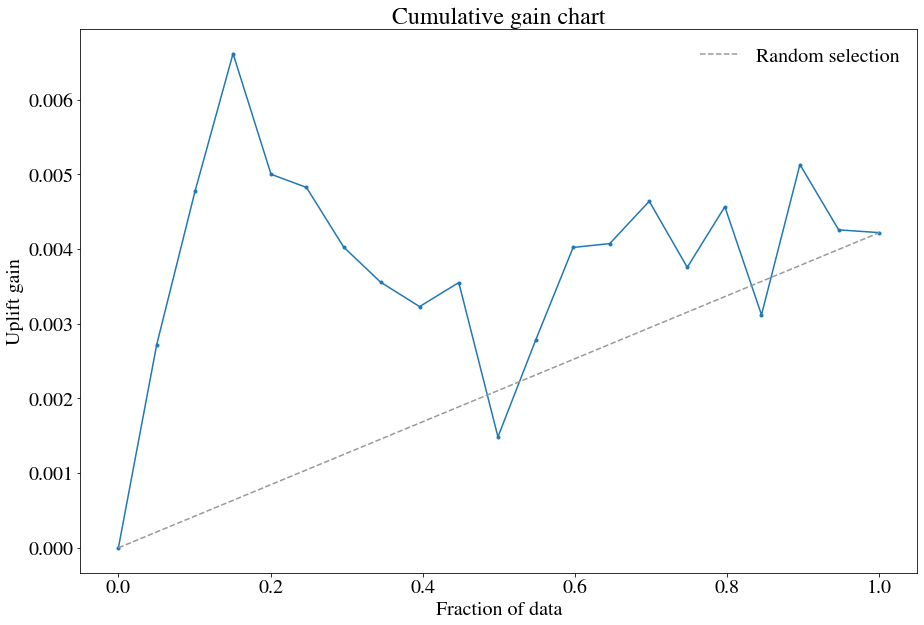

In [45]:
up.plot() # (random sampling)

----

## step 2. 테스트 21일

In [46]:
data_input = ( train_data_21, test_data_21 )

In [47]:
# xgboost 모델링
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

In [48]:
up.fit()

[01:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


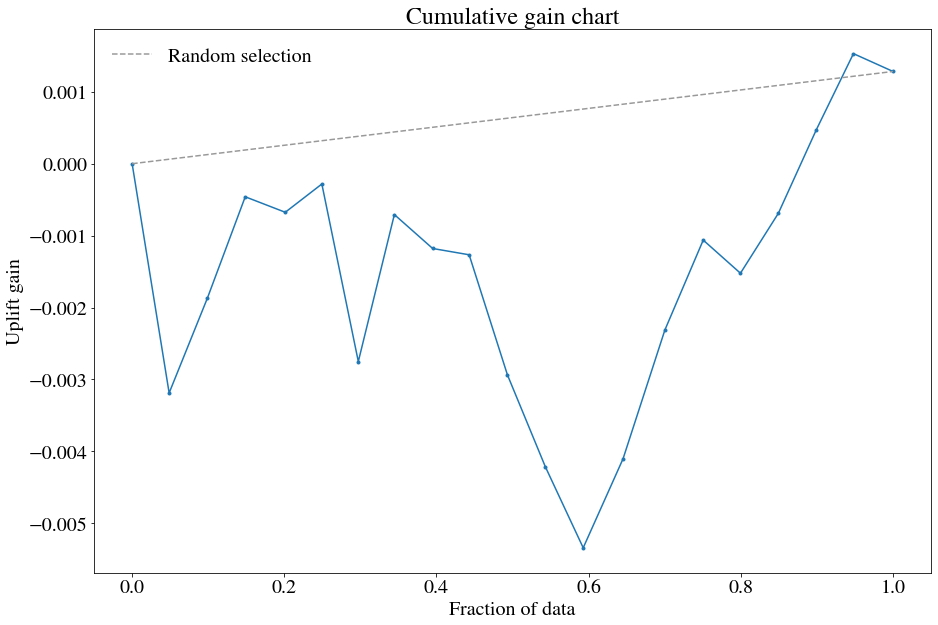

In [49]:
up.plot() # (random sampling)

----

## step 3. 테스트 22일

In [50]:
data_input = ( train_data_22, test_data_22 )

In [51]:
# xgboost 모델링
up = pylift.TransformedOutcome( data_input , col_treatment='cont_group', col_outcome='result_buy_yn' )

In [52]:
up.fit()

[01:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


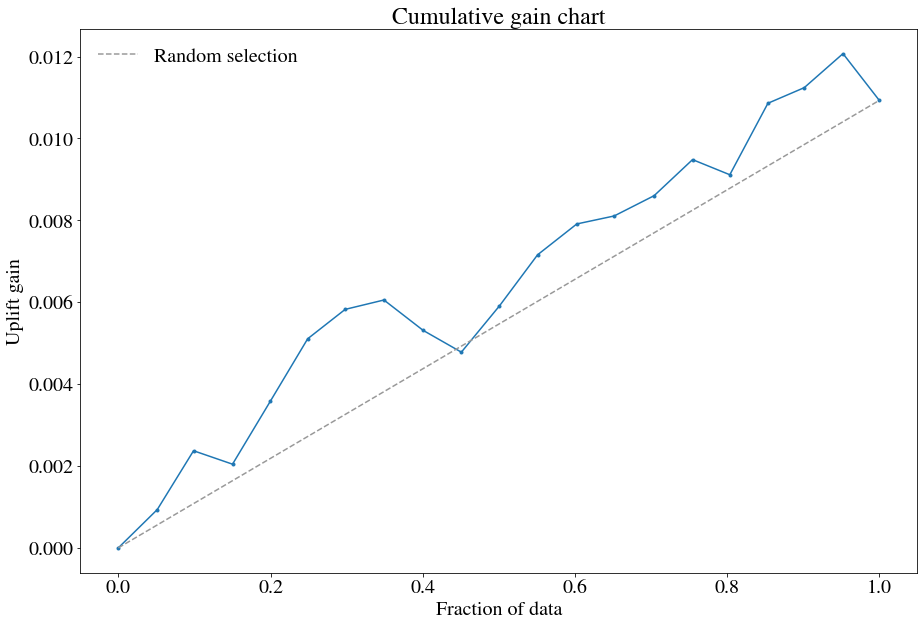

In [53]:
up.plot() # (random sampling)